In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore') # getting rid of 'SettingWithCopyWarning'

### Merging 12 csv files into one

In [3]:
directory = '.\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'

all_months = pd.DataFrame()

for file in os.listdir(directory):
    df = pd.read_csv(directory + '\\' + file)
    all_months = pd.concat([all_months, df])
    
all_months.to_csv('all_data.csv', index=False) # creating a new csv file

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Cleaning the data

* delete Nan values <br>
* delete titles

<b> 1. Deleting NaN values </b>

In [5]:
data = all_data.dropna() # dropping rows, where any value is a NaN value
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


<b> 2. Deleting rows with titles, not values we want </b>

In [6]:
data = data[data['Order Date'] != 'Order Date']
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### 1. What was the best month for sales? How much was earned that month?

<b> Adding months column </b>

In [7]:
date_list = data['Order Date'].tolist() # making a list from Order Date column

month_numbers = [date.split('/')[0] for date in date_list] # splitting each value and taking [0]; eg. 09/30/19 --> [0]==09

In [8]:
data['Month'] = month_numbers
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [9]:
data['Month'] = data['Month'].astype('int32') # changing Month type to integers

<b> Converting the columns' types </b>

In [10]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

<b> Adding sales column </b>

In [11]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


<b> Summing up monthly sales </b>

In [12]:
### my solution ###
### creating a dictionary where key = month number, value = month sale ###
### then searching for the biggest sale and its month ###

def create_sales_dict(df_name):
    
    sales_dictionary = {}
    
    for i in range (1,13):
        month_sales = df_name.loc[df_name['Month'] == i, 'Sales'].sum() # sum values from "Sales" column if Month == i
        sales_dictionary[i] = month_sales

    sums = list(sales_dictionary.values())
    best_sale = max(sums)

    for key, value in sales_dictionary.items(): # finding the best month by searching for the max value
        if value == best_sale:
            best_month = key
            
    return best_month, best_sale

create_sales_dict(data)


(12, 4613443.34)

In [13]:
### better solution from the tutorial ###
sales_results = data.groupby('Month').sum()['Sales']
sales_results

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

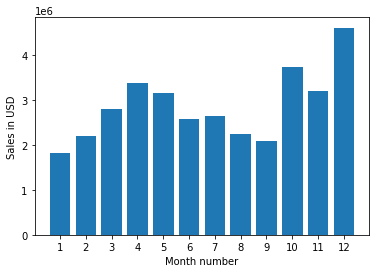

In [14]:
### Visualisation

months = range(1,13)

plt.bar(months, sales_results)
plt.xticks(months) # show all of the months
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

ANSWER:<b> The best month for sales was December,  4613443.34 USD $ was earned

### 2. What city sold the most product?
so it's not about sales but NUMBER of products <br>
I'm actually calculating a different thing than in the tutorial

<b> Adding a city column </b>

In [15]:
### solution from the tutorial aka stackoverflow ###

f = lambda x: x['Purchase Address'].split(',')[1] + ' ' + x['Purchase Address'].split(',')[2].split()[0]

# function takes city and state from Purchase Address (state is needed as there're the same city names in different states)

data['City'] = data.apply(f, axis=1)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [16]:
### mine ###

adress_list = data['Purchase Address'].tolist()

cities = [adress.split(',')[1] + ' ' + adress.split(',')[2].split()[0]  for adress in adress_list]

data['City'] = cities
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


<b> Finding a city which sold the most product

In [17]:
city_df = data.groupby('City').sum()['Quantity Ordered']
city_df

City
 Atlanta GA          16602
 Austin TX           11153
 Boston MA           22528
 Dallas TX           16730
 Los Angeles CA      33289
 New York City NY    27932
 Portland ME          2750
 Portland OR         11303
 San Francisco CA    50239
 Seattle WA          16553
Name: Quantity Ordered, dtype: int64

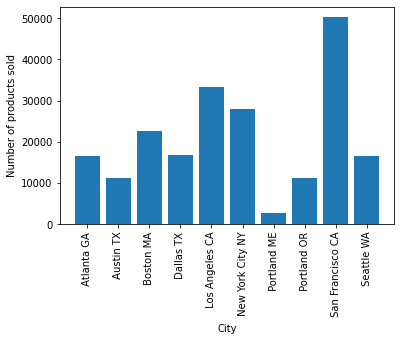

In [18]:
city_names = data['City'].unique() # taking all the unique values from 'City' column
city_names.sort() # so that they are in the same order as in city_df (sales correspond correctly to cities)

plt.bar(city_names, city_df)
plt.xticks(city_names, rotation = 'vertical')
plt.ylabel('Number of products sold')
plt.xlabel('City')
plt.show()

ANSWER: <b>The highest number of products was sold in San Francisco

### 3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?

<b> Converting Order Date values to date objects

In [19]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [20]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


<b> Creating hour and minute columns

In [21]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,17,30


<b> Visualising data

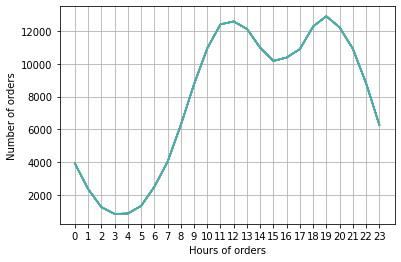

In [22]:
hours = [hour for hour, df in data.groupby('Hour')]
plt.plot(hours, data.groupby(['Hour']).count()) # counting how many orders where made at perticular hour

plt.xticks(hours)
plt.xlabel('Hours of orders')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

ANSWER: <b> Customers are most likely to buy products at 12am and 7pm, so the best time for advertisement is right before these peaks.

### 4. What products are most often sold together?

What does it mean that they're sold together?

sooo
I'm looking for a product IF at the same time another product was bought AND it was from the same address

<b> Finding orders, where more then 1 type of product was bought (an order is more then one row)

In [23]:
### my solution ###
# I'm lookig for duplicated addresses and dates (in one record)
# if both the address and date is duplicated it means someone has bought more than 1 type of product

duplicated_address = data[data.duplicated(subset=['Purchase Address', 'Order Date'], keep=False)]
duplicated_address

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13,49


<b> Creating a column with joined products from one order

In [24]:
# joining the products if Date and Address are the same
products = duplicated_address.groupby(['Order Date', 'Purchase Address']).agg({'Product':', '.join})
products

# iPhone, Batteries should be the same as Batteries, iPhone --> products should be sorted

f = lambda x: x['Product'].split(',') # making a list first
products['Splitted'] = products.apply(f, axis=1)

f = lambda x: sorted(x['Splitted']) # sorting
products['Sorted'] = products.apply(f, axis=1)
products


# changing products back to strings, so that I can groupby and count them
# cannot do that with lists - unhashable type

products['Back_to_strings'] = [','.join(map(str, l)) for l in products['Sorted']]
products

,,Product,Splitted,Sorted,Back_to_strings
Order Date,Purchase Address,,,,
2019-01-01 07:29:00,"628 Lake St, New York City, NY 10001","iPhone, Wired Headphones","[iPhone, Wired Headphones]","[ Wired Headphones, iPhone]","Wired Headphones,iPhone"
2019-01-01 11:25:00,"6 Johnson St, Atlanta, GA 30301","Google Phone, USB-C Charging Cable","[Google Phone, USB-C Charging Cable]","[ USB-C Charging Cable, Google Phone]","USB-C Charging Cable,Google Phone"
2019-01-01 12:02:00,"761 Lakeview St, Dallas, TX 75001","iPhone, Lightning Charging Cable","[iPhone, Lightning Charging Cable]","[ Lightning Charging Cable, iPhone]","Lightning Charging Cable,iPhone"
2019-01-01 12:51:00,"984 Lakeview St, San Francisco, CA 94016","Google Phone, USB-C Charging Cable","[Google Phone, USB-C Charging Cable]","[ USB-C Charging Cable, Google Phone]","USB-C Charging Cable,Google Phone"
2019-01-01 12:57:00,"229 Elm St, New York City, NY 10001","Google Phone, Wired Headphones","[Google Phone, Wired Headphones]","[ Wired Headphones, Google Phone]","Wired Headphones,Google Phone"
...,...,...,...,...,...
2019-12-31 20:51:00,"774 Washington St, San Francisco, CA 94016","AAA Batteries (4-pack), 20in Monitor","[AAA Batteries (4-pack), 20in Monitor]","[ 20in Monitor, AAA Batteries (4-pack)]","20in Monitor,AAA Batteries (4-pack)"
2019-12-31 22:04:00,"138 Lincoln St, Los Angeles, CA 90001","AAA Batteries (4-pack), Macbook Pro Laptop","[AAA Batteries (4-pack), Macbook Pro Laptop]","[ Macbook Pro Laptop, AAA Batteries (4-pack)]","Macbook Pro Laptop,AAA Batteries (4-pack)"
2020-01-01 00:10:00,"730 Pine St, San Francisco, CA 94016","iPhone, Apple Airpods Headphones","[iPhone, Apple Airpods Headphones]","[ Apple Airpods Headphones, iPhone]","Apple Airpods Headphones,iPhone"


<b> Counting the same groups of products (the same sets bought together)

In [25]:
how_many = products.groupby(['Back_to_strings']).count()
how_many.sort_values(by='Product', ascending=False).head(20)

,Product,Splitted,Sorted
Back_to_strings,,,
"Lightning Charging Cable,iPhone",882,882,882
"USB-C Charging Cable,Google Phone",856,856,856
"Wired Headphones,iPhone",361,361,361
"USB-C Charging Cable,Vareebadd Phone",312,312,312
"Wired Headphones,Google Phone",303,303,303
"Apple Airpods Headphones,iPhone",286,286,286
"Bose SoundSport Headphones,Google Phone",161,161,161
"Wired Headphones,Vareebadd Phone",104,104,104
"USB-C Charging Cable, Wired Headphones,Google Phone",78,78,78


In [26]:
### KEITH'S == PROPER WAY ###
# based on the fact that Order ID is unique for an order [*]

df = data[data['Order ID'].duplicated(keep=False)] # making new df with duplicated Order IDs
df 
# the result is the same as in duplicated_address df

df['Grouped products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df 
# the result is the same as 'Product' column in products df (made with agg)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0,25,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0,25,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13,49,"Google Phone,USB-C Charging Cable"


In [27]:
df = df[['Order ID', 'Grouped products']].drop_duplicates()
df

,Order ID,Grouped products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [28]:
###  counting the pairs
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped products']: # iterating through every Group products entry
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # counting combinations of 2 products
    

# why my solution is wrong? because it finds and counts only the same entries

# if we have 'Phone, iPhone, Cable' and 'Phone, iPhone', then they're two different entries
# my solution cannot see that the pair 'Phone, iPhone' is in 'Phone, iPhone, Cable'
# it treats them as if they have nothing in common and doesn't add 'Phone, iPhone, Cable'
# to the number of Phones and iPhones bought together

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

ANSWER <b> Most sold together products are: 'iPhone', 'Lightning Charging Cable', 1005

### 5. What product sold the most? Why do you think it sold the most?

<b> Grouping data by products, adding up the quantity and sorting values to show what was sold the most

In [29]:
product_sales = data.groupby('Product').sum()
product_sales.sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
iPhone,6849,4789400.00,47941,4794300.00,98657,201688


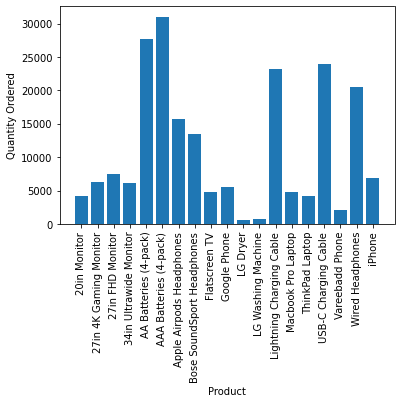

In [30]:
product_names = data['Product'].unique()
product_names.sort() # so that they are in the same order as in product_sales df


plt.bar(product_names, product_sales['Quantity Ordered'])
plt.xticks(product_names, rotation = 'vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

ANSWER: <b> Products sold the most: AAA Batteries (4-pack), AA Batteries (4-pack), USB-C Charging Cable </b><br>
    Why?<b> These are common, everyday use products, necessary for other devices to work, not specific to any brand. <br> Both are cheap. Batteries run down, whereas cables wear out, so there is a need to reequip

<b> Checking if price and quantity ordered corelate

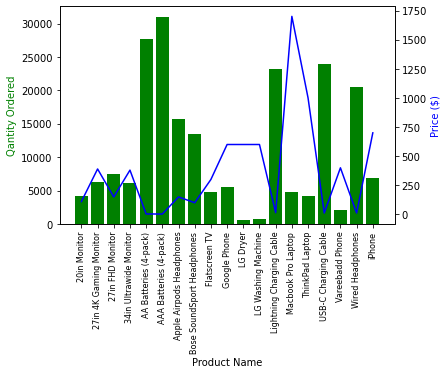

In [31]:
prices = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_names, product_sales['Quantity Ordered'], color='g') # initial plot with product quantities
ax2.plot(product_names, prices, 'b-') # second plot with product prices

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Qantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(product_names, rotation='vertical', size=8)

plt.show()